# --- Day 4: Giant Squid ---

You're already almost 1.5km (almost a mile) below the surface of the ocean, already so deep that you can't see any sunlight. What you can see, however, is a giant squid that has attached itself to the outside of your submarine.

Maybe it wants to play bingo?

Bingo is played on a set of boards each consisting of a 5x5 grid of numbers. Numbers are chosen at random, and the chosen number is marked on all boards on which it appears. (Numbers may not appear on all boards.) If all numbers in any row or any column of a board are marked, that board wins. (Diagonals don't count.)

The submarine has a bingo subsystem to help passengers (currently, you and the giant squid) pass the time. It automatically generates a random order in which to draw numbers and a random set of boards (your puzzle input). For example:
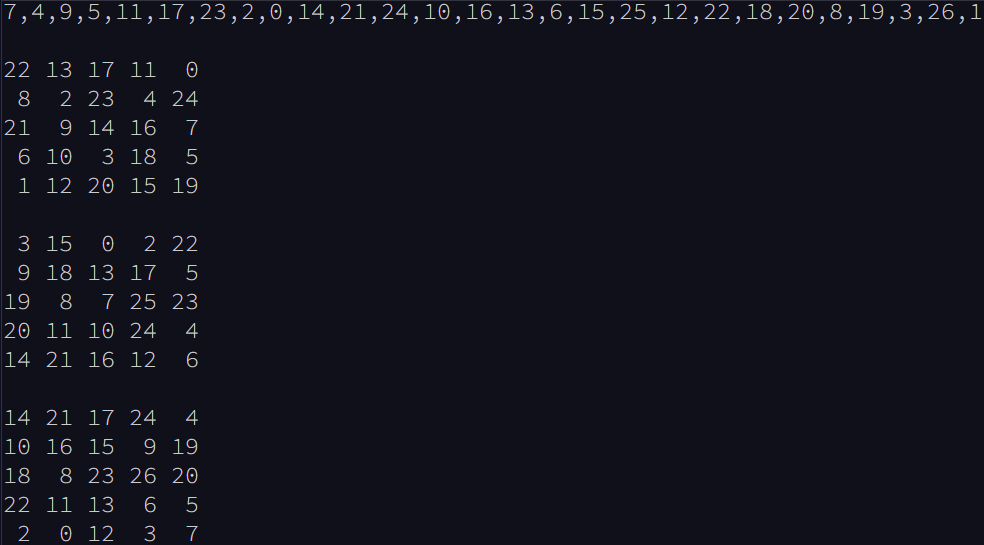

After the first five numbers are drawn (7, 4, 9, 5, and 11), there are no winners, but the boards are marked as follows (shown here adjacent to each other to save space):
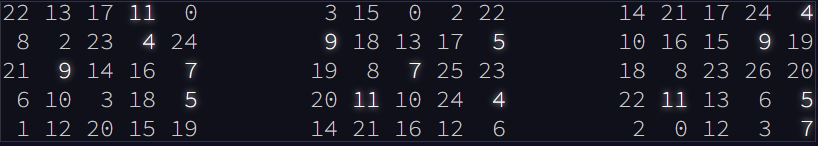

After the next six numbers are drawn (17, 23, 2, 0, 14, and 21), there are still no winners:
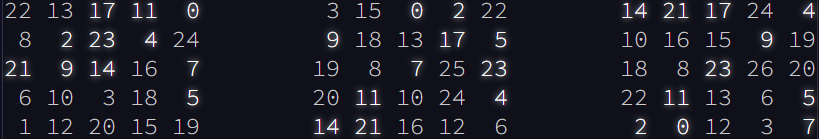

Finally, 24 is drawn:
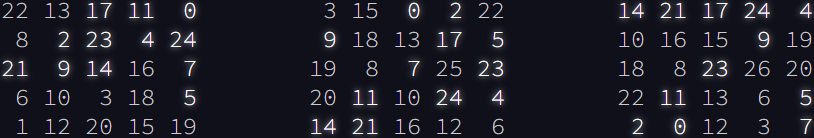
    
At this point, the third board wins because it has at least one complete row or column of marked numbers (in this case, the entire top row is marked: 14 21 17 24 4).

The score of the winning board can now be calculated. Start by finding the sum of all unmarked numbers on that board; in this case, the sum is 188. Then, multiply that sum by the number that was just called when the board won, 24, to get the final score, 188 * 24 = 4512.

To guarantee victory against the giant squid, figure out which board will win first. What will your final score be if you choose that board?

In [4]:
part1_input = "99,56,7,15,81,26,75,40,87,59,62,24,58,34,78,86,44,65,18,94,20,17,98,29,57,92,14,32,46,79,85,84,35,68,55,22,41,61,90,11,69,96,23,47,43,80,72,50,97,33,53,25,28,51,49,64,12,63,21,48,27,19,67,88,66,45,3,71,16,70,76,13,60,77,73,1,8,10,52,38,36,74,83,2,37,6,31,91,89,54,42,30,5,82,9,95,93,4,0,39 57 19 40 54 64 22 69 15 88  8 79 60 48 95 85 34 97 33  1 55 72 82 29 90 84 19 17 62 78 27 61 13 30 75 25 14 66 72 37 79 49 91 97  0 23 12 52 41 92 18 52 17 62 49 76 8 78 93 37 12 9 40 59 75 94 45  2 81 44 63 73 18 48 11 90 59 75 55 74 43 1 17 89 36 91 87 52 45 83 22 9  3 15 11 53 94 72 68 29 20 71 97 74 32 17 31  5 43 83 38 85 27 37 14 65 23  0 61 33 82 41 63 70 60  6 58 24 28 42 73 80 52 97 68 53 30 40 45 18 13 94 12  7 77 98 72 14 34 21 23 97 93 21 99 35 31  8 73 15 74 67 60 44  1 18 68 61 64 82 86 76 47 22 63 78 49  6 93 20 95 96 50 57 71 70 90 42  7  2 27 38 78 56 21 82 55 98 72 40 66 43  5 11 46 24 30 45 91 50 72 27 53  0 10  7 15 35 73 96  9 2 67  1 17 32 48 45 91 41 65 72 63 33 49  8 10 39 96 61 14 26 58 16 74 34 79 60 40 30 35 71  0 52 48 32 92 85 38 20 84 68 24 13 74  2 42 60 96 16 17 59 67 69  8 65 11 79 91 16 87 82 39 77 24 32 67 45 22 86 31 84 56 54 55 75 5 41  3 70 40 55 15 20 43 96 63 47 13 18 91 28 66 14 21 52 59  9 12 97 58 83 81  8 36 44 7 75 86 59  2 47 14 87 19 49 64  3 52 91 40 11 43 35  1 44 78 29 56  5 36 46 32 44  4 30 77  6 63 13 74 71 23 53 56 27 84 93 19 83 81 16 97 99 34 92 6 87 56 63 39 93 51 71 92 40 81 14  9 26 24 80 66 88 89 44 18  1 29  7  8 74 61  9 83 18 57 95 79 35 47 81 72 80 12 37 1  8 71 54 86 40  2 97 19 17 80 12 74 16 92 99 26 49 79 28 39 31 83 64 54 14 90 42 96 81 27 11 33 36 35 80 26 21 49  9 79 47 74 75 77 78 16 89 55 43 27 28 95 71 57 81 36  0 87 66 16 65 29 94  9 71 56 39 30 23 74 49  2 63 13 54 45 48 66 64 70 21 44 57  0 16 72 74 15 79 66 12 45 70 18 44 51 98 11 26 64 68 28 49 27 48 69 52  7  2 72 54 71 43 92 83 95 58 36  1 96 35 62 46 18 16 29 30 28 21 99 87  6 64 11 61 34 54 25 91 90 33 44 22 10 58 37 59  3 28 20 18 98 38  2 95 99 69 50 14 71 72 25 17  4 70 37 92 85 51 78 28 82 48 89 12 52  7 13 21 74 73 44 46 36 21 99 48 77 34 51 67 14 83 89 7 91 22 63 97 4 82 42 11 23 2 27 45 13 94 83 23 72 22 24 13 27 70 20 15 0 56 41  1 19 62 68 75 21 67 90 12 77 98 14 56 63 78 71 51 22 18 33 92 65 89 12 45 82 73 13 34 37 48 97 42 85 54  4 53 74 70 52 96 41 93 36 73 81  4 63 71  0  3 57 51 54 94 25 24 88 80 22 17 16 0 70 60 17  3 66 80 73 84 99 34 69 22 90 72 15 41  6 39 76 94  9 98 91 75 17 20  4 19 79 30 42  0 11  2 37 28 95 14 71 61 81 39 12 82 33 44 69 29 26 87 98 74 96 15 2 61  1 52 23 49 81  0 99 69 47 35 55 60 36 94 19 29 63 53 84 95 22 54 93 98 94  7  5 30 4 46 28 68 90 15 29 71 73 66 42 44 45 82 10 28 66 41 39 92 61 63 27 40 38 42 73 53 52 81 62 78 96 82 51 59 68 64 93 16 48 49 51 85 12 90 81 18 73 30 67 46 38 60 17 10 86 62 66 84 98 36 99  8 45 11 53 78 32 83 94  0 80 67 37 76  7 34 20  1 12 25 73 71 28 48 14 29 40 23 35 98 14 33 11 19 66 96 77 44 32 50 15 49 70 75 59 90 43 58 23 45 78 18 95 35 49 20 72 56 12 70  3  5 58 83 60 61 73 63 45 78 98 95 19 80 11 92 82 13 69  0 37 63 41 75 70 34 64 54 10  1 59  9 65 90 78 87 71 66 74 35 29 58 20 60 39 66 68 28 90 64 36 93  2 37 57 69 91 20 73 96 50 86 77 87 14 63 38 98 43 89 14 74 12 65 94 71  2 93 76 37 96 47 92 55 25 90 83 88 79 11 59 50 81 62 85 98 67 19 79 17 71 53 93 13 50 88 28 58 36 20 52 66 27 89 48 24 12 77 73 13  3 97 16 40 14  4 47 88 12 79 56 80 60 27  6 94  1 75 72 22 44 62 24 29 77 70 61 95 63 57 41 12  7 22 99 58 31 81 15  3 48 20 36 8 76 87 23 91 61 79 53 73 59 67 34 37 54 15 29 50 64 56 44 93 51  0 18 17 27 35 89  3 60 79 23 31 48 12 37 96 74 63  4 98 18 69  6  0 47 54 34 82 46 5 86 64 60 99 44 70 50 53 62 15 61 45 74 52 35 48 99 12 49 91 26 47 78  0 58 82 94 73  7 2 64 81 48 83 66 85 91 26 47 50 95 70 54 13 39 89 44 67  6 22  0 40 21  1 86 63 21 73 61 91 33 68 66 36 77 53 16 51 85 11 57 12 22 80 99 40  8 30 81 27 35 60 28 95 44 34  8 73 81 11 26 90 32 10 0 49 98  7 18 55 42 86 72 77 16 15 65 86 88 21 98 74 93  3 18  7  5 35 73 62 84 42 60 81 48 34 39 57 99 45 60 95 62 18 82 86 99 39 77 48 54 97 16 25 40 56 23 47 37 83 68 51 90 13 80 72 81 78 69 74 76 33 51 91 54 86 60 35 17 70 61 43 97 49 21 26 28 85 57 19 45 43 59 10 46 20 44 67 94 70 53 96 78 76 17 18 54 39 38 66 40 33 71 83 0 42 60 99 41 14 96 75 93 74 11 90 62 37 38 29 64 27 53 85 94 28 31 32 24 14 19 83 98 53 24 78 25 85 37 39  2 41  4 32 45 79 26 36 96 64 80 73 13 28 77  1  9 26 10 37 60 69 72 81 16 35 61 75 29 42 53 82 67 36 98 89 21 87 15 45 73 88 75 46 83 59 20 37 26 62 42  9 78 17 60 84 32 90 64 40 99 61 80 48 13 59 79 20 91 64 65 21 82 44 98 62 33 96 48 46 37 40  8 70 28 90 27 45 68 48 94 58 96 81 33 75 73 52 64 23 36 67 27 54 80 68 87 37  2 34 47  6 30 60 44 52 99 65 58 77 78 68 48 94 84 81 53 20 79 14  7  3 46 42 24 19  8 16 27 42 89 86 46 83 43 11 25 56 59 69 82 65 55 34 22 93 73 74  3 26 30 60 29 45 9 43 72 89 42 39 24 25 28 69 8 51 59  7 13 64 94 30 99 65 2 56 55 38 15 54 83 69 44 27 52 25 17 20 28 59  6 79 13 21 34 14 61 84 67 71 26 80 41 18 96 33 72 16 93 35 18 99 67 68 47 27 32 94 12 10 45 20 91 11 66 52 15  2 13 43 80  4 79 17 89 66 20 82  3 37 12 76 90 35 52 77 63 48 44 58  6 39 71 95 68 56 49 17 61 59 39 34 70  6 75 13  4 26 41 54 29  2 92 24 65 31 60 90 72 74 71 21 86 18 63 30 53 73 48 36 55 87 96 79 32 89 49 81 83 45 26 28 22 62 59 47 97 77 75 25 78 24 66 95 63 16 93 22 32 88 61 76 40 45 18 28 51 55 20 39 23 29 57 49 22  6 74 71 25 80 27 65 69 64 41 21 12 58 95 5 43 11  4 36 97 34 31 96 67 86 24 30  6 69 16 79 12 56 93 18 35 58 90 11 29 81 85 98 23 16 40 59 19 87 42 88 30 32 82 17 93  1 50 56 18 13 78 38 80 51 14 73  8 22 83 15 88 81  7 99 51 13 92 31 24 39  0 10  3 95 72 33 73 44 19 34 37 47 42 67  3 65 91 32 63 82 45 96 11 33 78 66 43 83 49 60 62 51 47 34 48 26 27 54 1  0 53 40 28 21 30 50 74 63 48 49  6 55 57 66 23 45 98 39 95 54 86 38 90 29 80 13 87 76 75 10 43 95 83 61 20 48 54 18 21 37 63 68  2 14 73 27 31 25 17 70 57 33 22 66 48 53 46 75 74 73 84 63 14 71 72 59  3 92 43 30 94  8 69 76 44 40 87 46 13 83  0  6 17 47 81 77 86 60 38 23 55 89 82 73 42 54 35 52 13  1 45 96 89 57 65 28 27 32 22 26 46 86 10 20 52 76 94 37 92  0 64 55 16 28 11 26 64 78 15  7 75 96 61 35 83 18  8 53 57  1 13 66 79 84 47  6 43 80 25 80 70  2 59 44 36 98 85 76 87  7 42 83 94 62 40 81 33 52 10 65 14 60 26 19 83 26 87 91 23 57 40 36 15 1 54  8 49 31 64  5 59 88 45 69 18 58 11 62 92 65 73 33 12 13 30 18 66 11 55 51 97 99 26 57 31 71 49 41 6 95 19 35 25 64  9 77 92 43 88 80 75 58 32 33 97 53 27 23 85 14 35 42 45 44 95 89 61 40 22 68 27 75 76 95 45 80 10 14 24 19 71 11 50 74 41 88  8  0 99 42 13 90 77 83 59 56  8 58 30 73 67 82  1 51 84 44 33 57 76 16  4 13 87 6 95 72 27 38 60 14 37 78 73 80 40 58 30 64 77 92 81  1 45 79 26 11 12 51 25 56 68 67 61 5 20 59  4 96 6 78 60 73 50 88  7 48  2 35 30 87 10 81 40 1 84 83 22 75 20 91  9 21 59 30 69 60 55 37 63 57 77 12 45 28 64 56 95 22 33 84 92 48 86 75 62 83 32 91 93 44 22 84 76 74 34 90 59 33 78 54 71 12 25 10 95 14 43 28 48 36 10 85  5 40 69 91 72 63 37 22 55 94 93 16 26 21 38 35 31  2 52 20  1 28 85  3  4 27 77 18 26 50 62 78 86 52 79 59 58 48 54 64 41 25  2 57 44 10 15 35 22 41 26 2 39 88 69 84 45 44 33 99 11 91 20 85 32 46 83 66 61 30 89 14  0 97  1  7 49 15 85 93 35 73 90 61  8  6 52 17 16 67 39 91 84 25 24 66 68  3 15 90 51 59 62 11 61 83 97 84 94 55 20 71  8  1 70 73 88 43 89 57  4 61 30 53  8 70 47 25  2 41 43 99 65 96 68 66 90 78 57 64 52 42 95 48 40 86 44 27  1 25 62 92 81  5 11 40 24 33 34 37  3 47 28 94 58 26 72 80 71 57  7 54 55 73 99  9 26 88 48 75 12 65 84 71 85 96 72 87 28 66 35 89 63 15 44 69 92 36 31 72 85 33 93 69 65 84 74 77 11 59 52 6 12 34 10 45 63 30 55 46 15 1 59 15 45 75 25 31 70 78 11 36 12 34  8 79 99 57 20 95 72 23 50 19 73 22 38 66 51 93 39 12 96 99 36 97 40 21 95 10 94 3 22 18 26 49 91 61 73 70 47"